##**Social media analytics using the Twitter data set**

## Table of Content
   
1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
## 1. Executive Summary
 

This report was commissioned to conduct analyses on modern customer support practices of companies through the social media platform, Twitter, the main objective of which to provide valuable insights and practical recommendations to support business decisions. Tweets associated with brand popularity and perception, customer satisfaction, and customer issues and concerns have been examined for this purpose.

The ten leading brands according to the number of tweets generated by both customers and companies are illustrated in Figure 1. With 12,828 tweets created, AmazonHelp dominates the list – amassing approximately 33% of the overall tweets for the top ten brands. It is followed by AppleSupport and Uber_Support, with 6,122 and 4,041 tweet counts, respectively. Looking separately at the tweets from customers and companies (see Tables 2 and 3), it is evident that the counts are relatively close. This demonstrates excellent response management by the brands – every customer concern is addressed.

For the top five brands, approximately 70% to 80% of the tweets are created during the middle of the week, specifically on Wednesdays and Thursdays (see Figures 2A to 2E). This infers that customers prefer to ask for support before the weekends come. It can also be implied that for the leading brands, issues are resolved within one to two days. Additionally, it has been observed that the number of tweets across days of the week becomes more even as the ranking of the company gets lower. This denotes that higher ranking companies, AmazonHelp, for example, settle customer concerns faster than lower ranking companies like British_Airways.

More than one-thirds (34.4%) of the customers for the top five brands is comprised of those who requested support from AmazonHelp (see Figure 3A). This accounts for 10.1% compared to the overall count of the customers. Two perspectives on the brand can be derived from this discovery: (a) the customer base of Amazon is relatively larger than that of other brands, causing an increase number of support requests; and (b) the products and services provided by Amazon are more problematic than others, resulting to augment assistance requirements. To be able to determine which instances are applicable in this case, further analysis should be conducted.

The proportion of positive sentiments received by the top five brands are parallel to their ranks – with AmazonHelp at the top of the list having received a total of 2,888 favourable opinions or 42.5% of the total positive sentiment counts (see Figure 4). British_Airways and Tesco, on the other hand, obtained the least with 818 and 825, respectively. Seeing as positive perspectives are attributed to brand popularity, and vice versa, it can be inferred that higher ranking brands take extensive measures in protecting their social media image by trying to keep their customers satisfied with the support they provide.

The topics more frequently mentioned in the tweets from the customers of AppleSupport, as seen in Figure 7, are wireless connections, operating systems, apps and messaging, and device backups. Specifically, customers’ concerns relate mainly to WiFi and charger connectivity, software versions, application updates, and iwatch, iTunes and icloud backups. These are the areas to which Apple can implement improvements to reduce the number of customer-identified issues. Figure 8, on the other hand, illustrates the percentage frequency to which each topic is mentioned, with device backup as the most popular. It is, however, evident that the probabilities across all topics are almost even. This suggests that while prioritizing concerns about device backups, AppleSupport should also pay equal attention to the other topics.

With the insights generated from brand popularity and perception, customer satisfaction, and customer concern prioritisation, the following practical implications are derived: (a) to maintain or increase brand standing when it comes to customer support practices via social media platforms, companies should aim to respond to every concern posted by customers and that these should be accomplished almost immediately (within 1 to 2 days); (b) considering that larger customer bases are more difficult to manage, less famous companies should learn and apply customer-handling practices from larger brands if they intend on keeping up with the competition; and (c) most frequently mentioned topics should be used by companies to determine areas of their products and services that needs most improvements and  decide which concerns should be prioritized and pay more attention to.

<a id = "cell_exploration"></a>
## 2. Data Exploration

In relation to the objective of providing insights into modern customer support practices and impact, tweets associated with brand popularity, top company responses, and customer support requests have been explored in this section. The analyses have been derived from a sample of 100,000 tweets from Customer Support on the Twitter data set. An extract of the dataset is shown in Table 1.

In [ ]:
#####Loading data files
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('A1-DataSet.csv')
df = pd.DataFrame(data)
print('Table 1: Extract of the dataset')
display(df.head())

Table 1: Extract of the dataset


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


### <font color='midnightblue'>2.1. Popularity of brands based on the number of tweets</font>

Determining the most popular brands in social media platforms prove to be important in making business business, as deep and meaningful insights on customer handling can be derived from observing the practices to which these companies confirm. In the analysis, popularity of brands is determined based on the combined number of tweets created by both customers and companies.

#### 2.1.1. Number of tweets generated by customers

To obtain the total number of tweets generated by customers for the companies, mentions (e.g. @sprintcare) have been extracted from the texts. Result 1 shows the unique authors for each tweet. As observed, some tweets have mentioned multiple authors (e.g. '115821, 7109, 7110'). In the analysis, these tweets have been counted for all authors - that is, if a single tweet mentioned @AppleSupport, @Uber_Support, and @AmazonHelp altogether, a count is added for all companies.

In [ ]:
#####Computing number of tweets generated by customers

#Extract all authors that have been mentioned for every tweet and create new column
import re
df['mentions'] = (df['text'].str.findall(r'@([^\s@]+)').apply(', '.join))
print('Result 1: Extract of unique authors derived from tweet mentions')
df['mentions'].unique()

Result 1: Extract of unique authors derived from tweet mentions


array(['115712', 'sprintcare', '115713', ..., '115821, 7109, 7110',
       '144296', '144297'], dtype=object)

Table 2 exhibits an extract of the total number of customer tweets generated for each unique author. AmazonHelp has shown to be the most popular brand, with mention counts exceeding the second ranking company, AppleSupport, by nearly 100%. 

In [ ]:
#Split mentions (new column for every author mentioned in tweet)
new = df["mentions"].str.split(", ", expand = True)

#Sum counts for each unique author (includes cleaning of mention IDs)
brand2 = new.apply(pd.value_counts).fillna(0).astype(int)
brand2['count'] = brand2.sum(axis=1)
brand2 = ((brand2['count']).sort_values(ascending=False)).reset_index()
brand2['index'] = [re.sub('[^a-zA-Z0-9_]', '', x) for x in brand2['index']]
brand2 = brand2[brand2['index'] != ""]
brand2 = ((brand2.groupby(['index']).sum()).apply(pd.Series)).sort_values(by='count',ascending=False)
print('Table 2: Extract of total mention counts per company')
display(brand2.head())

Table 2: Extract of total mention counts per company


,count
index,
AmazonHelp,5904
AppleSupport,3016
Uber_Support,1939
Tesco,1562
British_Airways,1412


#### 2.1.2. Number of tweets generated by companies

The number of tweets generated by companies have been determined based on the tweets created by each unique author ID. Table 3 displays the top 5 companies with the most number of tweets. With the exception of British_Airways, the rankings in the list are identical to that of the top brands mentioned by the customers.

In [ ]:
#####Computing number of tweets generated by customers
brand1 = ((df.groupby(['author_id']).size()).apply(pd.Series)).reset_index()
brand1 = brand1[brand1['author_id'] != ""]
brand1 = brand1.set_index('author_id')
brand1.columns = ['count']
brand1 = brand1.sort_values(by='count',ascending=False)
print('Table 3: Extract of total tweets generated by companies')
display(brand1.head())

Table 3: Extract of total tweets generated by companies


,count
author_id,
AmazonHelp,6924
AppleSupport,3106
Uber_Support,2102
Tesco,1450
SpotifyCares,1356


Looking closely and comparing the tweet counts of the top 5 companies with the customer tweet counts (Tables 2 and 3), it can be observed that tweets created by companies are generally greater than the tweet mentions by the customers. This means that most, if not all, customer tweets are being responded by, which implies excellent customer service by the respective brands.

#### 2.1.3. Total number of tweets generated per brand

Combining the number of tweets generated by the customers to the tweets created by the companies, the overall brand popularity is determined. Figure 1 illustrates the top 10 most popular companies. AmazonHelp ranks first with 12,828 tweet counts, followed by AppleSupport and Uber_Support, with 6,122 and 4,041 tweet counts, respectively. It is noticeable that AmazonHelp has totally dominated the list, garnering about approximately 33% of the overall numbers. Additionally, tweet counts for the last 5 companies are relatively close, which makes their rankings almost interchangeable.

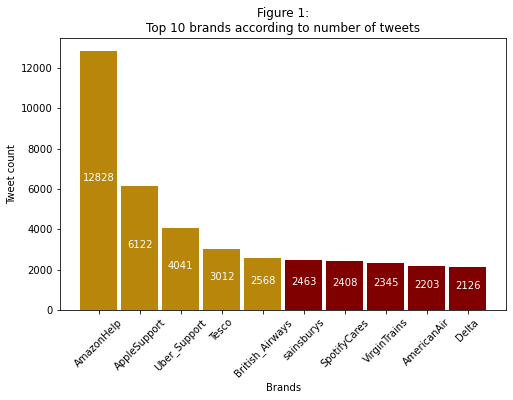

In [ ]:
######Computing total number of tweets for each company

#Combine tweets generated by companies and customers
brand = brand1.add(brand2, fill_value=0)
brand = (brand['count'].nlargest(n=10)).apply(pd.Series)
brand.columns = ['count']
brand = (brand.reset_index()).sort_values(by='count',ascending=False)

#####Creating the bar graph

#Create labels for bars
def l(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', c = 'white')
  
if __name__ == '__main__':
    # Creatie data on which bar chart will be plotted
    x = list(brand['index'])
    y = brand['count'].astype(int)

fig = plt.figure(figsize = (8, 5))

#Create bar graph
colori = ["darkgoldenrod" if (r>2500) else "maroon" for r in y]
plt.bar(x, y, color =colori, width = 0.9)
l(x, y)

#Main chart labels
plt.xlabel("Brands")
plt.ylabel("Tweet count")
plt.title("Figure 1:\nTop 10 brands according to number of tweets")
plt.xticks(rotation = 45)
plt.show()

### <font color='midnightblue'>2.2. Number of tweets in days of a week for the top 5 brands</font>

Several insights can be inferred from observing the volume of concerns conveyed and addressed for the top brands for each day of the week, which includes efficiency and effectivity of social media responsiveness. With this, the number of tweets for each day of the week for the top 5 companies (see Figure 1) have been analysed.

In [ ]:
######Create columns for days of week as 'day' and 'day_id'

df['created_at'] = pd.to_datetime(df['created_at'])
df['day'] = df['created_at'].dt.day_name()
df['day_id'] = df['created_at'].dt.dayofweek #for sorting purposes
df = pd.concat([df,new], axis=1)

######Filtering tweets generated by company

#Filter top 5 companies
top5 = df[(df['author_id'] == 'AmazonHelp') | (df['author_id'] == 'AppleSupport') | (df['author_id'] == 'Uber_Support')
         | (df['author_id'] == 'Tesco') | (df['author_id'] == 'British_Airways')]

#Group by company and day
brand3 = (top5.groupby(['author_id','day','day_id']).size()).apply(pd.Series)
brand3.columns = ['count']
brand3 = (brand3.reset_index()).sort_values(by=['author_id','day_id'],ascending=True)

######Filtering tweets generated by customers

#Filter top 5 companies
top5a = df[((df.iloc[:,-21:] == 'AmazonHelp').any(axis=1)) | ((df.iloc[:,-21:] == 'AppleSupport').any(axis=1)) |
            ((df.iloc[:,-21:] == 'Uber_Support').any(axis=1))| ((df.iloc[:,-21:] == 'Tesco').any(axis=1)) |
           ((df.iloc[:,-21:] == 'British_Airways').any(axis=1))]

#Group by company and day
b0 = (((top5a.groupby([0,'day','day_id']).size()).apply(pd.Series)))
b0.columns = ['w']
b0 = b0.reset_index()
b0.columns = ['a','day','day_id',0]
b1 = (((top5a.groupby([1,'day','day_id']).size()).apply(pd.Series)).reset_index())
b2 = (((top5a.groupby([2,'day','day_id']).size()).apply(pd.Series)).reset_index())
b3 = (((top5a.groupby([3,'day','day_id']).size()).apply(pd.Series)).reset_index())
b4 = (((top5a.groupby([4,'day','day_id']).size()).apply(pd.Series)).reset_index())
b5 = (((top5a.groupby([5,'day','day_id']).size()).apply(pd.Series)).reset_index())
b6 = (((top5a.groupby([6,'day','day_id']).size()).apply(pd.Series)).reset_index())
b7 = (((top5a.groupby([7,'day','day_id']).size()).apply(pd.Series)).reset_index())
b8 = (((top5a.groupby([8,'day','day_id']).size()).apply(pd.Series)).reset_index())
b9 = (((top5a.groupby([9,'day','day_id']).size()).apply(pd.Series)).reset_index())
b11 = (((top5a.groupby([11,'day','day_id']).size()).apply(pd.Series)).reset_index())
b12 = (((top5a.groupby([12,'day','day_id']).size()).apply(pd.Series)).reset_index())
b1.columns = ['a','day','day_id',0]
b2.columns = ['a','day','day_id',0]
b3.columns = ['a','day','day_id',0]
b4.columns = ['a','day','day_id',0]
b5.columns = ['a','day','day_id',0]
b6.columns = ['a','day','day_id',0]
b7.columns = ['a','day','day_id',0]
b8.columns = ['a','day','day_id',0]
b9.columns = ['a','day','day_id',0]
b11.columns = ['a','day','day_id',0]
b12.columns = ['a','day','day_id',0]
frames = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b11, b12]
result = pd.concat(frames)
result = result[result['a'] != ""]
result['a'] = [re.sub('[^a-zA-Z0-9_]', '', x) for x in result['a']]
brand4 = ((((result.groupby(['a','day','day_id']).sum()).sort_values(by=['day_id'],ascending=True)).apply(pd.Series))).reset_index()

Figures 2A to 2E illustrate the tweet counts for each day of the week for the top 5 brands. Generally, the distribution of tweets across the brands are similar, with peaks at the middle of the week. With the exception of AppleSupport which maximum tweets is on Wednesday, tweet counts for all brands are highest every Thursday. Additionally, the least tweets are made on either Monday or Saturday. With this, it can be inferred that - (a) customers prefer to ask for support and seek for issue resolutions; and (b) companies aim to respond to the problems - before the weekends (i.e. Friday, Saturday, Sunday) come. Moreover, as approximately 70% to 80% of the tweets are distributed across only two days (i.e. Wednesday and Thursday) of the week, it can be deduced that all concerns are addressed almost immediately.

It can also be observed from the charts that as the ranking of the company gets lower, the distribution of the tweets becomes more even. This can be related to the response time each company takes to resolve customer concerns. With this, it can be said that higher ranking companies (e.g. AmazonHelp) settle customer issues faster than lower ranking companies (e.g. British_Airways).

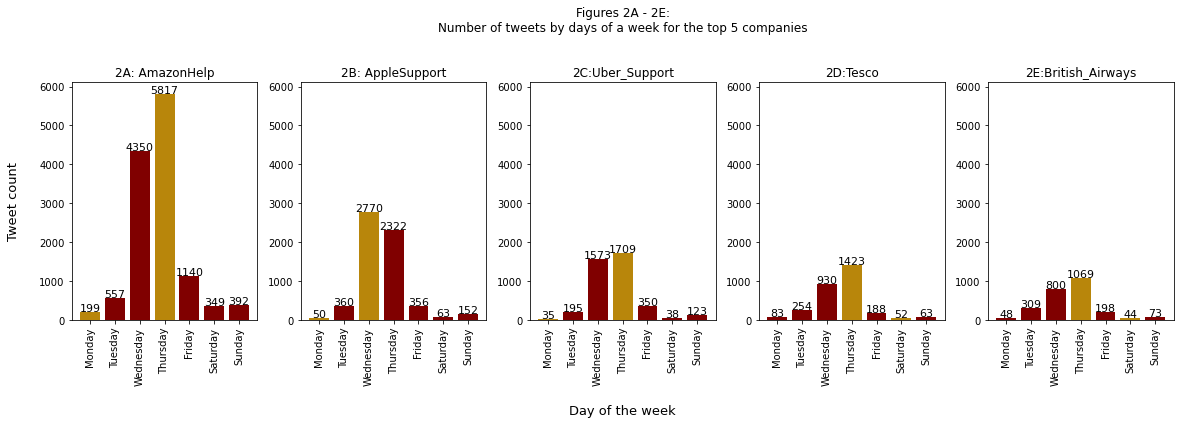

In [ ]:
#####Creating the bar graphs for each of the top 5 companies

#Define x & y axes
y1 = ((brand3[brand3['author_id'] == 'AmazonHelp']).set_index('day_id')['count'])+((brand4[brand4['a'] == 'AmazonHelp']).set_index('day_id')[0])
y2 = ((brand3[brand3['author_id'] == 'AppleSupport']).set_index('day_id')['count'])+((brand4[brand4['a'] == 'AppleSupport']).set_index('day_id')[0])
y3 = ((brand3[brand3['author_id'] == 'Uber_Support']).set_index('day_id')['count'])+((brand4[brand4['a'] == 'Uber_Support']).set_index('day_id')[0])
y4 = ((brand3[brand3['author_id'] == 'Tesco']).set_index('day_id')['count'])+((brand4[brand4['a'] == 'Tesco']).set_index('day_id')[0])
y5 = ((brand3[brand3['author_id'] == 'British_Airways']).set_index('day_id')['count'])+((brand4[brand4['a'] == 'British_Airways']).set_index('day_id')[0])
x = list(brand3['day'].unique())

#Set colors of the bars
color1 = ["darkgoldenrod" if (r>5000) | (r<200) else "maroon" for r in y1]
color2 = ["darkgoldenrod" if (r>2500) | (r<=50) else "maroon" for r in y2]
color3 = ["darkgoldenrod" if (r>1600) | (r<=35) else "maroon" for r in y3]
color4 = ["darkgoldenrod" if (r>1000) | (r<55) else "maroon" for r in y4]
color5 = ["darkgoldenrod" if (r>1000) | (r<45) else "maroon" for r in y5]

#Define labels for bars
def label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+20,y[i], ha="center", fontsize=11)

# Draw subplots
plt.rcParams["figure.figsize"] = [16.5, 6]

ax1 = plt.subplot(1, 5, 1)
plt.subplot(1, 5, 1)
plt.bar(x,y1, color=color1)
label(x,y1)
plt.ylabel('Tweet count\n', fontsize=13)
plt.xticks(rotation = 90)
plt.title("2A: AmazonHelp")

plt.subplot(1, 5, 2, sharey=ax1, sharex=ax1)
plt.bar(x,y2, color = color2)
label(x,y2)
plt.xticks(rotation = 90)
plt.title("2B: AppleSupport")

plt.subplot(1, 5, 3, sharey=ax1, sharex=ax1)
plt.bar(x,y3, color = color3)
label(x,y3)
plt.xlabel('\nDay of the week', fontsize=13)
plt.xticks(rotation = 90)
plt.title("Figures 2A - 2E:\nNumber of tweets by days of a week for the top 5 companies\n\n\n2C:Uber_Support")

plt.subplot(1, 5, 4, sharey=ax1, sharex=ax1)
plt.bar(x,y4, color = color4)
label(x,y4)
plt.xticks(rotation = 90)
plt.title("2D:Tesco")

plt.subplot(1, 5, 5, sharey=ax1, sharex=ax1)
plt.bar(x,y5, color = color5)
label(x,y5)
plt.xticks(rotation = 90)
plt.title("2E:British_Airways")
plt.tight_layout()
plt.show()

### <font color='midnightblue'>2.4. Customer support requests for AmazonHelp</font>

The volume and frequency to which customers contact companies regarding the product and/or services they obtained could determine quality and. When done through social media platforms such as Twitter, it is crucial to the company as all customers have access to the comments. This implies the significance of analysing the number of customers who voiced out concerns, especially for the leading brand Amazon.

In the analysis, customer requests are attributed to two factors: (a) whether the tweet is inbound to a company; and (b) whether the customer mentioned the brand in the tweet. Additionally, the number of customers who asked for support from the companies is defined as the count of unique customer Twitter IDs. Figures 3A and 3B illustrate these numbers for the entire dataset and each of the top 5 companies.

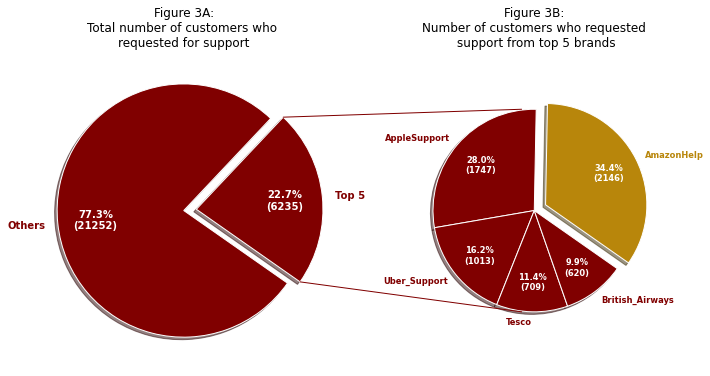

In [ ]:
#####Processing data for pie chart use
#Count total number of unique customers who requested for support
t = len((df[(df['inbound'] == True)]).groupby(['author_id']).size())

#Count number of unique customers who requested for support from top 5 companies
az = len(df[(df['inbound'] == True) & ((df.iloc[:,-21:] == 'AmazonHelp').any(axis=1))]['author_id'].unique())
ap = len(df[(df['inbound'] == True) & ((df.iloc[:,-21:] == 'AppleSupport').any(axis=1))]['author_id'].unique())
ub = len(df[(df['inbound'] == True) & ((df.iloc[:,-21:] == 'Uber_Support').any(axis=1))]['author_id'].unique())
tc = len(df[(df['inbound'] == True) & ((df.iloc[:,-21:] == 'Tesco').any(axis=1))]['author_id'].unique())
sp = len(df[(df['inbound'] == True) & ((df.iloc[:,-21:] == 'British_Airways').any(axis=1))]['author_id'].unique())
t5 = az+ap+ub+tc+sp

#Count number of unique customers who requested for support from other companies
o = t - (az+ap+ub+tc+sp)

#####Creating the pie charts for unique customers who requested for support
import numpy as np
from matplotlib.patches import ConnectionPatch

#Make figure and assign axis objects
fig = plt.figure(figsize=(10, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

#Define colors for the pie charts
colors = ['maroon', 'maroon']
colors2 = ['darkgoldenrod','maroon','maroon','maroon','maroon']

#large pie chart parameters
company = ['Top 5','Others']
customers = [t5,o]
explode = [0.1,0]

def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, t*x/100)

patches, texts, pcts = ax1.pie(customers, colors = colors, explode=explode, shadow=True, startangle=325, autopct=my_fmt, 
                               labels=company, pctdistance=0.7, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.tight_layout()

#Small pie chart parameters
company2 = ['AmazonHelp','AppleSupport','Uber_Support','Tesco','British_Airways']
customers2 = [az,ap,ub,tc,sp]
explode2 = [0.1,0,0,0,0]
width = .2

def my_fmt2(x):
    return '{:.1f}%\n({:.0f})'.format(x, t5*x/100)

patches2, texts2, pcts2 = ax2.pie(customers2, colors = colors2, explode=explode2, shadow=True, startangle=325, autopct=my_fmt2, 
                               labels=company2, pctdistance=0.7, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
                                  radius=0.8, textprops={'size': 'smaller'})

for i, patch in enumerate(patches2):
  texts2[i].set_color(patch.get_facecolor())

plt.setp(pcts2, color='white', fontweight='bold')
plt.setp(texts2, fontweight=600)
plt.tight_layout()

#Set chart titles
ax1.set_title('Figure 3A:\nTotal number of customers who \nrequested for support')
ax2.set_title('Figure 3B:\nNumber of customers who requested\n support from top 5 brands')

#Draw lines between the two plots
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

#Draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, .8), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0.5, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

#Draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.8), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0.5, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

Looking closely at Figure 3A, it can be seen that 22.7% or almost a quarter of the total customers seeked help from the top 5 companies. Of the customers of the top 5 companies, 34.4% are that of the most popular brand, AmazonHelp, comprising of 2,146 customers (see Figure 3B). Additionally, customers of AmazonHelp accounted for 10.1% of the overall customer count. From these, two opposite perspectives on the brand can be inferred: (a) Amazon has a relatively larger customer base than the other brands, which is why the count support-seeking customers is high; and (b) Amazon products and services are more problematic than others, which is why the number of customers requesting for assistance is high. A deeper and more detailed analysis should be conducted to determine which (or if both) of the instances are applicable.

## 3. Sentiment Analysis

It is important to observe whether comments of the customers, accessible to all through social media platforms, can help boost brand quality. For this reason, sentiment analysis is performed on the tweets of the top 5 companies.

### <font color='midnightblue'>3.1. Text Pre-processing</font>

Tweets of the customers of the top 5 companies have been pre-processed to prepare for sentiment analysis. The aim of text cleaning is to be able to include only the words that would be relevevant to the analysis. With this, firstly, incomprehensible strings, like urls and user IDs, are removed. Next, to avoid from confusing contractions (e.g. won't, don't, etc.) with actual words, these are expanded. Stop words, which does not express any sentiment, are also discarded. Lastly, non-alphanumeric characters are taken out and letters are reduced to lower case to avoid falsely classifying the same words differently. Table 3 exhibits the comparison between the original and cleaned tweets. As shown, only words that are significant to the analysis remained.

In [ ]:
df2 = df

#####Text pre-processing
pd.options.mode.chained_assignment = None

#Remove urls
df2['clean_text'] = [re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x) for x in df2['text']]

#Remove mentions
df2['clean_text'] = [re.sub(r'@([^\s@]+)', '', x) for x in df2['clean_text']]

#Remove contractions
import contractions
df2['clean_text'] = df2['clean_text'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))

#Remove stop words
import nltk
sw = nltk.corpus.stopwords.words('english')
df2['clean_text'] = df2['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

#Remove non alphabet
df2['clean_text'] = [re.sub('[^A-Za-z ]', '', x) for x in df2['clean_text']]

#Case lowering
df2['clean_text']= df2['clean_text'].apply(lambda x: x.lower())
print('Table 3: Extract of cleaned text vs original text')
display(df2[['text','clean_text']].head())

Table 3: Extract of cleaned text vs original text


,text,clean_text
0,@115712 I understand. I would like to assist y...,i understand i would like assist you we would ...
1,@sprintcare and how do you propose we do that,propose
2,@sprintcare I have sent several private messag...,i sent several private messages one responding...
3,@115712 Please send us a Private Message so th...,please send us private message assist you just...
4,@sprintcare I did.,i did


### <font color='midnightblue'>3.2. Lexicon-based Sentiment Analysis</font>

Lexicon-based sentiment analysis (LSA) is used to determine each customer's sentiments on the companies. To start with, polarity scores are calculated for each tweet, as shown in Table 4. Next, each tweet are assigned tags (i.e. Positive and/or Negative) based on the previously computed polarity scores. As can be observed from Table 5, tweets can be (a) solely positive (b) solely negative, (c) neither positive or negative, or (d) both positive and negative.

In [ ]:
#####Lexicon-based sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df2['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df2['clean_text']]
df2['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df2['clean_text']]
print('Table 4: Extract of polarity scores for cleaned text')
display(df2[['clean_text','pos','neg']].head())

Table 4: Extract of polarity scores for cleaned text


,clean_text,pos,neg
0,i understand i would like assist you we would ...,0.321,0.0
1,propose,0.000,0.0
2,i sent several private messages one responding...,0.000,0.0
3,please send us private message assist you just...,0.291,0.0
4,i did,0.000,0.0


In [ ]:
#####Classify sentiments as positive or negative
def neg(df2):
    if (df2['neg'] > 0):
        val = 1
    else:
        val = 0
    return val

def pos(df2):
    if (df2['pos'] > 0):
        val = 1
    else:
        val = 0
    return val

df2['Negative'] = df2.apply(neg, axis=1)
df2['Positive'] = df2.apply(pos, axis=1)

print('Table 5: Extract of polarity scores for cleaned text (assigned)')
display(df2[['clean_text','pos','neg','Positive','Negative']].head())

Table 5: Extract of polarity scores for cleaned text (assigned)


,clean_text,pos,neg,Positive,Negative
0,i understand i would like assist you we would ...,0.321,0.0,1,0
1,propose,0.000,0.0,0,0
2,i sent several private messages one responding...,0.000,0.0,0,0
3,please send us private message assist you just...,0.291,0.0,1,0
4,i did,0.000,0.0,0,0


Result 2 shows counts of tweets for each sentiment for the identified top 5 companies. Of the 13,465 tweets generated, 6,803 are positive and 4,908 are negative. Of the 6,803 positive tweets, 4,075 are solely positive and 2,728 are both positive and negative. On the other hand, 2,180 tweets are classified as solely negative and 4,482 as neutral. Overall, the tweets included in the dataset leans towards having neutral to positive sentiment.

In [ ]:
#####Filtering tweets generated by customers for top 5 companies
qd = df2[(df2['inbound'] == True) & (((df2.iloc[:,-31:] == 'AmazonHelp').any(axis=1)) |
                                     ((df2.iloc[:,-31:] == 'AppleSupport').any(axis=1)) |
                                     ((df2.iloc[:,-31:] == 'Uber_Support').any(axis=1)) |
                                     ((df2.iloc[:,-31:] == 'Tesco').any(axis=1)) |
                                     ((df2.iloc[:,-31:] == 'British_Airways').any(axis=1)))]
print('Result 2: Count of tweets for sentiments')
print("Total number of tweets for Top 5 companies: ", len(qd))
print("Total number of tweets that are solely positive: ", len(qd[(qd['Positive'] == 1) & (qd['Negative'] == 0)]))
print("Total number of tweets that are solely negative: ", len(qd[(qd['Positive'] == 0) & (qd['Negative'] == 1)]))
print("Total number of tweets that are neither positive or negative: ", len(qd[(qd['Positive'] == 0) & (qd['Negative'] == 0)]))
print("Total number of tweets that are both positive and negative: ", len(qd[(qd['Positive'] == 1) & (qd['Negative'] == 1)]))

Result 2: Count of tweets for sentiments
Total number of tweets for Top 5 companies:  13465
Total number of tweets that are solely positive:  4075
Total number of tweets that are solely negative:  2180
Total number of tweets that are neither positive or negative:  4482
Total number of tweets that are both positive and negative:  2728


### <font color='midnightblue'>3.3. Proportion of positive sentiments for the top 5 companies</font>

The proportion of the overall positive sentiments received by each of the top 5 companies are exhibited in Figure 4. AmazonHelp, among others, received the most number, with 2,888 or 42.5% of the total positive sentiments. British_Airways and Tesco, on the other hand,obtained the least with 818 and 825, respectively. It is evident that the popularity of the brands are attributed to the positive sentiments they received, and/or vice versa, given that the positive proportion ranking is identical to the brand popularity ranks. This means that the more famous the brand is, the more positive sentiments they receive, and/or vice versa. This also implies that more popular brands take more extensive measures to protect their image.

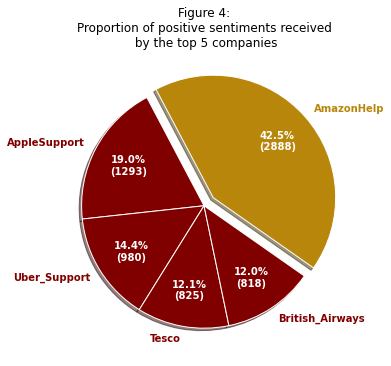

In [ ]:
#####Creating pie chart of positive sentiments for top 5 companies
#Filter positive sentiments for top 5 companies
am = len(qd[(qd['Positive'] == 1) & ((qd.iloc[:,-31:] == 'AmazonHelp').any(axis=1))])
at = len(qd[(qd['Positive'] == 1) & ((qd.iloc[:,-31:] == 'AppleSupport').any(axis=1))])
ut = len(qd[(qd['Positive'] == 1) & ((qd.iloc[:,-31:] == 'Uber_Support').any(axis=1))])
to = len(qd[(qd['Positive'] == 1) & ((qd.iloc[:,-31:] == 'Tesco').any(axis=1))])
ba = len(qd[(qd['Positive'] == 1) & ((qd.iloc[:,-31:] == 'British_Airways').any(axis=1))])

#Make figure and assign axis objects
fig2 = plt.figure(figsize=(10, 5.0625))
ax3 = fig2.add_subplot(121)
fig2.subplots_adjust(wspace=0)

#Define colors for the pie charts
colors4 = ['darkgoldenrod','maroon','maroon','maroon','maroon']

#Pie chart 1 parameters
company3 = ['AmazonHelp','AppleSupport','Uber_Support','Tesco','British_Airways']
customers3 = [am,at,ut,to,ba]
explode3 = [0.1,0,0,0,0]
t6 = len(qd[qd['Positive'] == 1])

def my_fmt3(x):
    return '{:.1f}%\n({:.0f})'.format(x, t6*x/100)

patches3, texts3, pcts3 = ax3.pie(customers3, colors = colors4, explode=explode3, shadow=True, startangle=325, autopct=my_fmt3, 
                               labels=company3, pctdistance=0.7, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

for i, patch in enumerate(patches3):
  texts3[i].set_color(patch.get_facecolor())

plt.setp(pcts3, color='white', fontweight='bold')
plt.setp(texts3, fontweight=600)
plt.tight_layout()

#Set chart titles
ax3.set_title('Figure 4:\nProportion of positive sentiments received\n by the top 5 companies')

plt.show()

## 4. Topic Modeling

The topics to which customers contact companies for are significant when making decisions with regards to customer service and  product development strategies. With these, commonly discussed topics, specifically for AppleSupport, are discovered.

### <font color='midnightblue'>4.1. Text pre-processing</font>

To prepare for topic modelling, further text pre-processing are applied to the tweets. Words that have 3 letters or less are removed from the text, as these are mainly composed of those irrelevant to topic selection. The texts are then converted to a list, as seen in Result 3, tokenized (see Result 4), and converted into a matrix of words (see Result 5). In the process of tokenization, words are also categorised using part of speech tagging. For the analysis, only those that are under the noun category are included to derive better results. This is ideal because customer concerns mainly relate to products and services provided by companies, which are nouns. At the end of the pre-processing, a matrix of 10,202 documents with 2,285 terms is derived. Figure 5 exhibits the 40 most common terms from the tweets of AppleSupport customers, with iphone, phone, and apple being mentioned most frequently.

In [ ]:
#####Filtering tweets from customers of AppleSupport
df3 = df2[(df2['inbound'] == True) & ((df2.iloc[:,-31:] == 'AppleSupport').any(axis=1)) & (df2['clean_text'] != '')]
df3 = df3.reset_index(drop=True)
print('Table 6: Extract of cleaned text from AppleSupport customers')
display(df3[['clean_text']].head())

Table 6: Extract of cleaned text from AppleSupport customers


,clean_text
0,the newest update i made sure download yesterday
1,is changing showing correctly social media pla...
2,tried resetting settings restarting phone
3,this looks like
4,i iphone plus yes i


In [ ]:
#####Converting column for text into list
import re

doc = df3['clean_text']
clean = []
for r in range(len(doc)):
    rev = doc[r]
    try:
        rev = re.sub('[^A-Za-z ]', ' ', rev) 
        rev = rev.lower()
        Tokens = rev.split()
        Filtered_token = [w for w in Tokens if len(w)>3] 
        rev = ' '.join(Filtered_token)        
    except:
        continue

    clean.append(rev)  

clean = [line for line in clean if line.strip() != ''] #Remove whitespace in list

print('Result 3: Extract of cleaned text converted to list')
clean[0:5]

Result 3: Extract of cleaned text converted to list


['newest update made sure download yesterday',
 'changing showing correctly social media platforms',
 'tried resetting settings restarting phone',
 'this looks like',
 'iphone plus']

In [ ]:
#####Selecting only nouns from list of words
from nltk import pos_tag, word_tokenize

nouns = [] 
for i in range(len(clean)):
     for word,pos in pos_tag(word_tokenize(clean[i])):
         if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
             nouns.append(word)

print('Result 4: Extract of tokenized words with noun tags')
nouns[0:5]

Result 4: Extract of tokenized words with noun tags


['update', 'download', 'yesterday', 'media', 'platforms']

In [ ]:
#####Convert list to vector
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cd = cv.fit_transform(nouns)
print('Result 5: Size of vectorized words matrix')
cd

Result 5: Size of vectorized words matrix


<10202x2285 sparse matrix of type '<class 'numpy.int64'>'
	with 10202 stored elements in Compressed Sparse Row format>

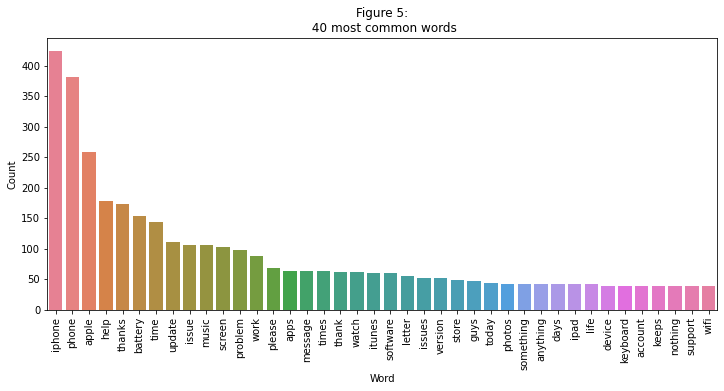

In [ ]:
#####Visualising top 40 most common words in vector
import numpy as np
import seaborn as sns
terms = cv.get_feature_names()

# Count the popularity of words
tc = np.zeros(len(terms))
for t in cd:
    tc+=t.toarray()[0]

ct = (zip(terms, tc))
ct = sorted(ct, key=lambda x:x[1], reverse=True)[0:40]
    
words1 = [w[0] for w in ct]
counts = [w[1] for w in ct]
x_pos = np.arange(len(words1))
    
plt.figure(2, figsize=(12, 5))
plt.subplot(title='Figure 5:\n 40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words1, rotation=90) 
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

### <font color='midnightblue'>4.2. Term selection</font>

From Figure 5, it can be seen that the frequency of terms are imbalanced across the list. The words iphone, phone, and apple have relatively higher counts than others. As frequency/infrequency of words relate to the value they carry, terms with overly high (greater than 20%) and low (less than 0.1%) are discarded. To illustrate, the words iphone and phone are not important as cellphones are the flagship product of Apple. Similarly, there is no sense in including the term apple as it is the name of the brand and would not produce any valuable insight. After filtering, 339 words remained for modelling.

In [ ]:
#####Removing highly frequent and infrequent words
keepIndex = [];
for t in range(len(tc)):
    if tc[t] <= 84 and tc[t] >= 5:
        keepIndex.append(t)

print('Result 6: Number of Terms Remained (documents x terms)')

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = cd[:,keepIndex] 
ReducedCount

Result 6: Number of Terms Remained (documents x terms)


<10202x339 sparse matrix of type '<class 'numpy.int64'>'
	with 5073 stored elements in Compressed Sparse Row format>

### <font color='midnightblue'>4.3. Topic number selection</font>

The remaining 339 words are represented as bag of words to preserve the frequency to which they appear in the customer tweets. Result 7 shows an example of the new structure after conversion. The terms are then used to determine the optimal number of topics, through application of Latent Dirichlet Allocation (LDA) models. To evaluate the degree of semantic similarity between high scoring terms, comparison of coherence scores is performed.

In [ ]:
#####Keeping filtered terms only
Cleaned_new = []
for r in range(len(clean)):
    each_item = []
    for t in clean[r].split():
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_new.append(each_item) 
#Remove empty lists from list
Cleaned_new = [x for x in Cleaned_new if x]

##### Constructing term dictionary in the format "Term : Index"
import gensim.corpora as corpora
id2word = corpora.Dictionary(Cleaned_new)

##### Representing as Bag of Words
Corpus = [id2word.doc2bow(text) for text in Cleaned_new]
print('Result 7: Extract of terms converted to bag of words')
display(Corpus[0:5])     

Result 7: Extract of terms converted to bag of words


[[(0, 1), (1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)]]

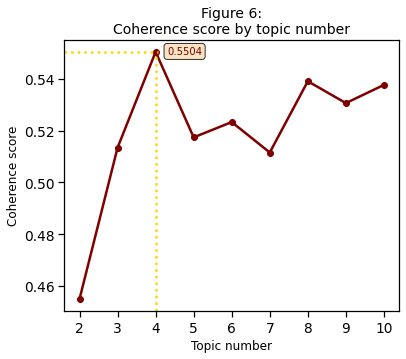

In [ ]:
#####Determining ideal topic number for the LDA model
###Coherence score computations for 2 to 10 topics
#Import necessary libraries
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#
from gensim.models import CoherenceModel

#Evaluate models with topic numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=0)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)

###Visualise coherence scores
#Create line plot for coherence scores
fig = plt.figure(figsize = (6, 5))
plt.plot(coherence_scores, color='maroon', marker='o')
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Figure 6:\nCoherence score by topic number', fontsize=14)
plt.xlabel('Topic number', fontsize=12)
plt.ylabel('Coherence score', fontsize=12)
#Emphasize max value in plot
m = np.max(coherence_scores)
plt.axhline(m, color='gold', ls='dotted', xmax=0.28)
plt.axvline(2, color='gold', ls='dotted', ymax=0.95)
plt.text(2.3,m-0.001,round(m,4), size=10,color='maroon',bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.show()

Figure 6 exhibits the coherence scores generated by each LDA for topics between 2 and 10. As observed, the model with 4 topics performed the best, with a coherence score of 0.5504. This will be used as the number of topics for modelling the tweets generated by customers of AppleSupport.

### <font color='midnightblue'>4.4. Most frequently mentioned topics by customers of AppleSupport</font>

The LDA model with the highest coherence score, having 4 topics, is used to determine the the topic to which most customer concerns belong to. Figure 7 shows that the most popular topics among AppleSupport customers are wireless connections, operating systems, apps and messaging, and device backup. The 10 words with the highest distrubutions for each topic are also visualised. For wireless connections, the customers' main concern relates to wifi and charger connectivity. For operating systems, on the other hand, customers generally enquire about the software versions. Issues relating to application updates, on one hand, are the principal concern for apps and messaging. On the topic of device backup, customers are primarily interested in details about backups for the iwatch, iTunes, and icloud.

Having known the subject to which majority of the customers ask support for, AppleSupport can determine possible areas where improvements to their products and services can be implemented. Having the highest word distribution across all topics, Apple should pay close attention to issues relating to wifi connectivity, iwatch and iTunes.

                                    Figure 7: Wordclouds of top 10 words for best LDA model
 
       Wireless connections             Operating Systems              Apps and messaging                 Device backup


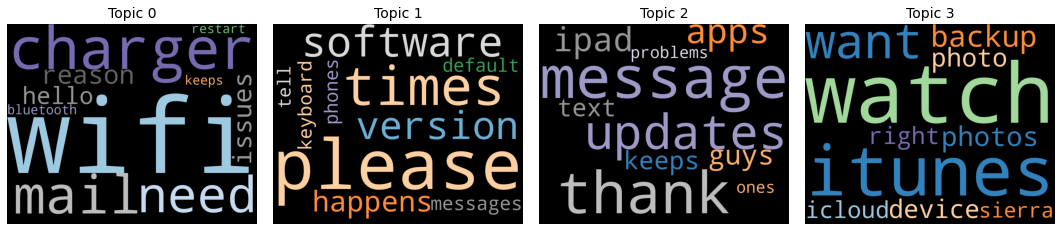

In [ ]:
#####Saving the best LDA model
lda_model = Trained_Models[np.argmax(coherence_scores)]

#####Creating wordcloud of top 10 words for best LDA model
from wordcloud import WordCloud, STOPWORDS

#Wordcloud parameters
cloud = WordCloud(background_color='black',
                  random_state=3,
                  width=1000,
                  height=800,
                  max_words=15,
                  colormap='tab20c')
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, 4, figsize=(15,8), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=14))
    plt.gca().axis('off')

#General chart parameters
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
print('                                    Figure 7: Wordclouds of top 10 words for best LDA model\n ')
print('       Wireless connections             Operating Systems              Apps and messaging                 Device backup')
plt.show()

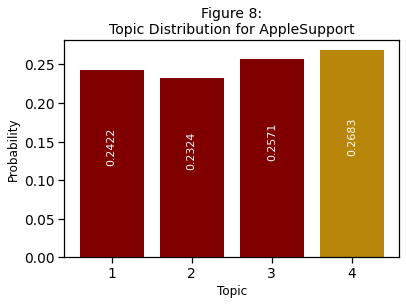

In [ ]:
#####Computing topic distribution for each document
topic = lda_model[Corpus]
all_topics_csr = gensim.matutils.corpus2csc(topic)
all_topics_numpy = all_topics_csr.T.toarray()
TopicDis_Doc = all_topics_numpy

#####Computing overall topic distribution for all documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
    
#####Visualizing topic distributions for AppleSupport
Bar_index = np.asarray(range(1,lda_model.num_topics))
#Create bar labels
def l(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i]/2, round(y[i],4), ha = 'center', c = 'white', rotation=90, fontsize = 11)
  
if __name__ == '__main__':
    # Creatie data on which bar chart will be plotted
    x = Bar_index
    y = Overall_Topic_Dis.tolist()
    
#Create chart
plt.figure(figsize=(6,4)) 
plt.title('Figure 8:\nTopic Distribution for AppleSupport', fontsize=14)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Probability', fontsize=12)
#Create bars
h = np.max(Overall_Topic_Dis.tolist())
g = Overall_Topic_Dis.tolist()
color5 = ["darkgoldenrod" if (r==h) else "maroon" for r in g]
plt.bar(Bar_index, g, color=color5)
l(x, y)
plt.xticks(Bar_index, Bar_index)
plt.show()

Figure 8 illustrates the probability distribution of the topics for AppleSupport. Among the four topics, device backup is the most frequently mentioned. It is, however, noticeable that the distribution across topics is almost even. This denotes that while prioritising concerns about device backups, AppleSupport should pay the same equal attention to the other three topics.

### 5. Practical Implication

Revisiting the insights derived from the different analyses performed on the Twitter dataset, the following are recommended to the companies to better support customers:

#### Brand popularity and perception

It has been observed in Tables 2 and 3 that for the most popular brands, the tweets generated by the company are greater than, or almost equal to the number of tweets created by customers. Additionally, that 70% to 80% of the tweets are spread across only two days, Wednesday and Thursday. 

This implies that to be able to maintain or increase brand standing when it comes to customer support practices via social media platforms, companies should aim to respond to every concern posted by customers and that these should be accomplished almost immediately (within 1 to 2 days).

#### Customer satisfaction

Figure 3B has shown that the most popular brands have the largest number of unique customers contacting the companies through Twitter. The same can be said for the amount of positive sentiments received – the more popular and greater the number of customers of the brand, the higher positive sentiments are received and/or vice versa.

This denotes that top brands expend a lot of effort in ensuring that customers are satisfied with the kind of support they provide, considering that larger customer bases are more difficult to manage. Less famous companies should learn from this and conduct a deeper and more detailed analysis of these brands’ customer support practices if they intend on keeping up with the competition.

#### Customer concern prioritization

The most common topics and concerns frequently mentioned by customers of AppleSupport have been identified in Figure 7. Additionally, Figure 8 has shown the distribution of tweet subjects across the themes.

Through topic modelling, companies are able to determine the most recurring issues for each and across the topics. In the case of AppleSupport, these are wifi connectivity, iwatch, and iTunes. This implies that companies should use this discovery as an opportunity to determine areas of their products and services that needs most improvements.

The information on the distribution of frequently used words across topics, on the other hand, could be used by companies to decide which concerns should be prioritized and pay more attention to. Which, in the case of AppleSupport with highest distribution for device backups but having almost a uniform spread across topics, means focusing on backup issues but giving equal treatments to other topics at the same time.

### References:

Multiple bar charts
https://pythonguides.com/matplotlib-multiple-bar-chart/
https://shantoroy.com/python/python-bar-chart-using-matplotlib/

Day of week conversion
https://www.delftstack.com/howto/python/python-datetime-day-of-week/#use-the-weekday-method-to-get-the-name-of-the-day-in-python

Pie chart parameters
https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

Contractions expansion
https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/

Top words in topic
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

Pie chart effects
https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/

Pie chart value label
https://stackoverflow.com/questions/59644751/matplotlib-pie-chart-show-both-value-and-percentage

Split
https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

Text processing
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

Removing stop words (not tokenized)
https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

POS tagging
https://www.kaggle.com/code/hrmello/part-of-speech-tagging/notebook

Substring after @ extraction
https://stackoverflow.com/questions/29836812/extract-text-after-specific-character

Creating same axis for multiple plots
https://www.tutorialspoint.com/setting-the-same-axis-limits-for-all-subplots-in-matplotlib

Bar chart labels
https://pythonguides.com/matplotlib-bar-chart-labels/

Sorting top k from dataframe
https://datascientyst.com/get-top-10-highest-lowest-values-pandas/

Changing markdown color
https://stackoverflow.com/questions/19746350/how-to-change-color-in-markdown-cells-ipython-jupyter-notebook

Adding multiple columns
https://stackoverflow.com/questions/38472276/pandas-sum-multiple-dataframes